# Zomato Data Analysis

Data cleaning, exploration, and visualization to extract insights from Zomato's restaurant data.

##  Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv("Zomato-data-.csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## 🧹 Data Cleaning

In [6]:
dataframe = dataframe[dataframe['rate'].notnull()]
dataframe = dataframe[~dataframe['rate'].isin(['NEW', '-'])]

def handleRate(value):
    return float(str(value).split('/')[0])
dataframe['rate'] = dataframe['rate'].apply(handleRate)

dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '')
dataframe['approx_cost(for two people)'] = pd.to_numeric(dataframe['approx_cost(for two people)'], errors='coerce')


dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## 📊 Exploratory Data Analysis

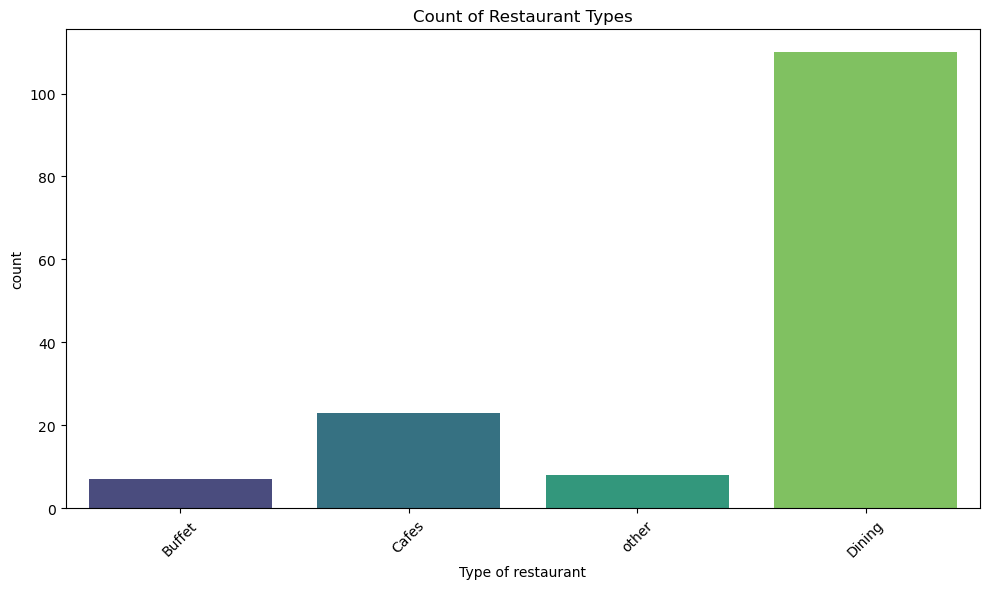

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='listed_in(type)', hue='listed_in(type)', palette='viridis', legend=False)

plt.xticks(rotation=45)
plt.xlabel("Type of restaurant")
plt.title("Count of Restaurant Types")
plt.tight_layout()
plt.show()

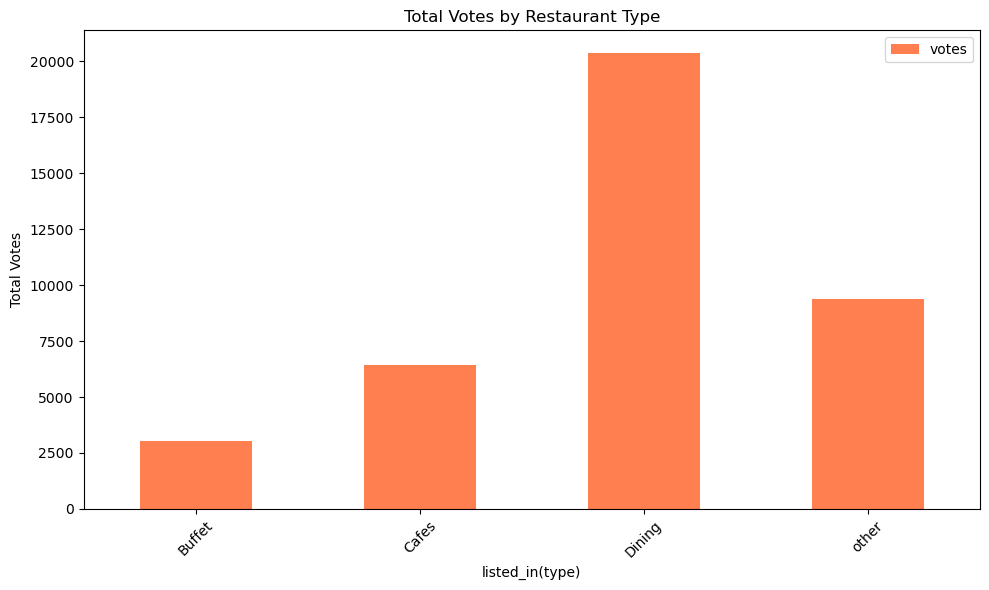

In [8]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
result.plot(kind='bar', figsize=(10, 6), color='coral')
plt.ylabel("Total Votes")
plt.title("Total Votes by Restaurant Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Additional Visualizations

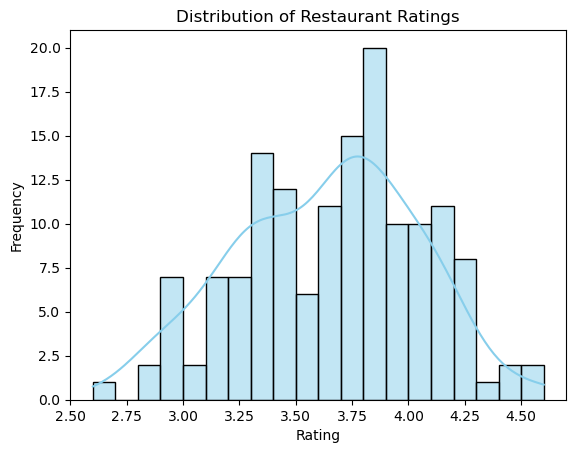

In [9]:
sns.histplot(dataframe['rate'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

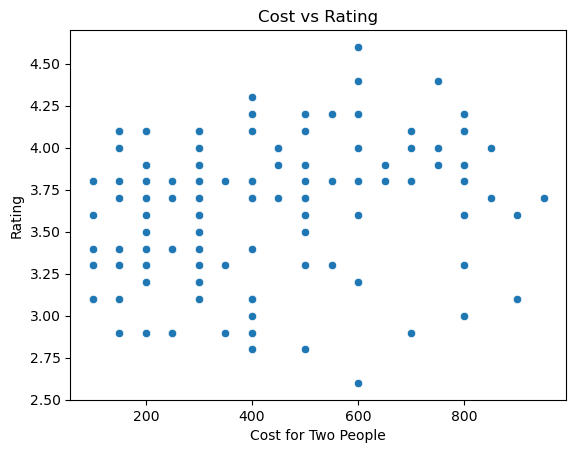

In [10]:
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=dataframe)
plt.title("Cost vs Rating")
plt.xlabel("Cost for Two People")
plt.ylabel("Rating")
plt.show()

## Summary
- Cleaned and analyzed restaurant data.
- Visualized restaurant types, ratings, and cost trends.
- Gained insights into customer preferences and restaurant popularity.
